In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.visualize import load_experiment
# exps = [f"experiments/80G_3ch_ampbcstep_M41_rho8_p{x/10:.1f}"  for x in range(11, 31)]
exps = [f"experiments/80G_3ch_frepbc_M41_rho1_ol40_strides41_p{x/10:.1f}"  for x in range(11, 31)]
datas = {name:load_experiment(name) for name in exps}

print('RMPS:', datas['experiments/80G_3ch_frepbc_M41_rho1_ol40_strides41_p1.1']['model'].rmps())

RMPS: 8086.8807658764545


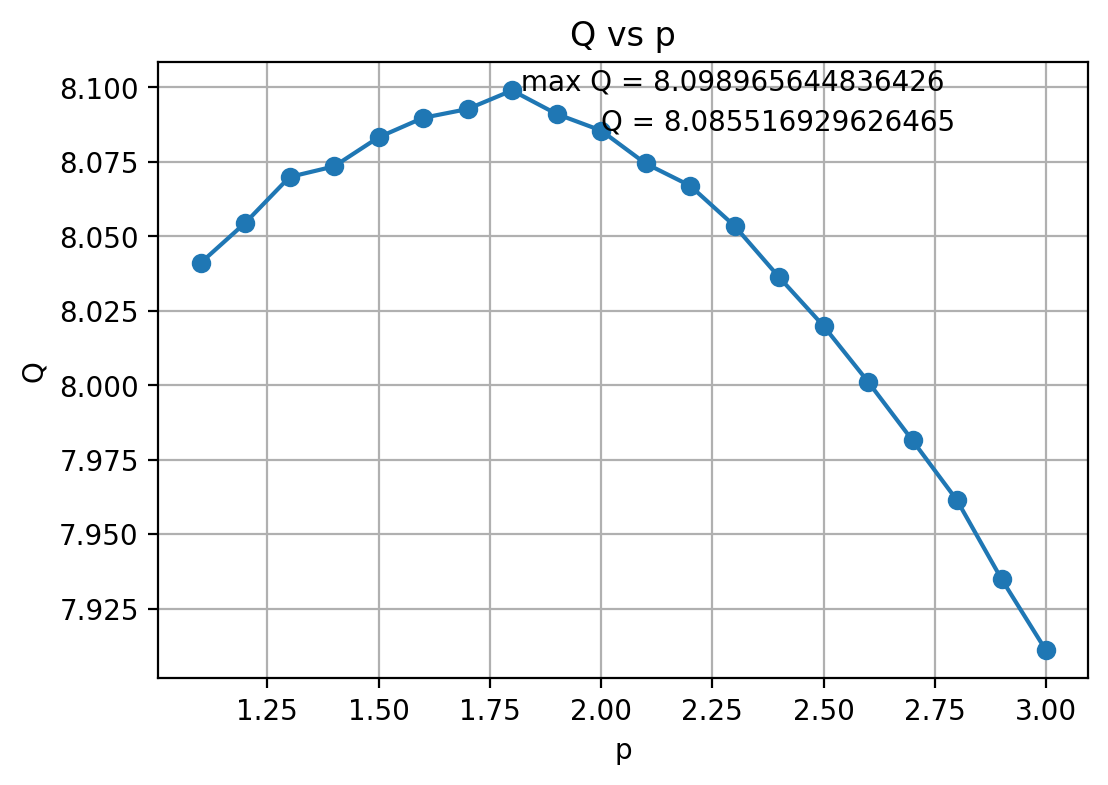

In [19]:
p = np.array([x/10  for x in range(11, 31)])
Q =  np.array([datas[key]['Metric/Qsq']['value'][-1] for key in exps])

plt.figure(dpi=200, figsize=(6, 4))
plt.plot(p, Q, '-o')
plt.xlabel('p')
plt.ylabel('Q')
plt.title('Q vs p')
plt.text(2, Q[p==2][0], f'Q = {Q[p==2][0]}')
plt.text(p[np.argmax(Q)], np.max(Q), f' max Q = {Q[np.argmax(Q)]}')
plt.grid()
plt.show()

experiments/80G_3ch_frepbc_M41_rho1_ol40_strides41 rmps: 8086.8807658764545
experiments/80G_3ch_ampbcstep_M41_rho2 rmps: 4514


(7.0, 8.5)

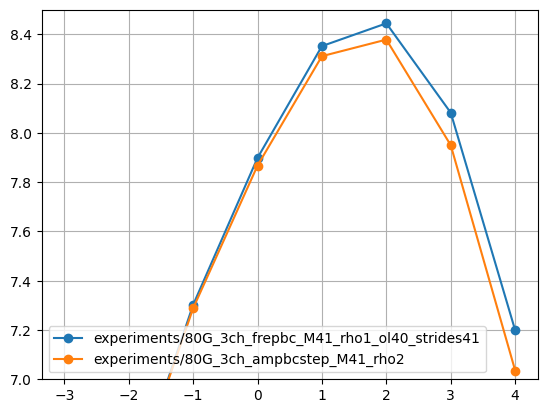

In [31]:
import numpy as np 
import matplotlib.pyplot as plt
from scripts.visualize import load_experiment
import pkufiber as pf

paths = [
        'experiments/80G_3ch_frepbc_M41_rho1_ol40_strides41',
        # 'experiments/80G_3ch_fdbp_v1',
        # 'experiments/80G_3ch_pbcdbp_v2',
        # 'experiments/80G_3ch_pbcdbp_v4',
        # 'experiments/80G_3ch_pbcdbp_v6',
        # 'experiments/80G_3ch_ampbcstep_M401_rho1',
        'experiments/80G_3ch_ampbcstep_M41_rho2',
        ]

results = {path: load_experiment(path) for path in paths}

for key, result in results.items():
    qfactor, power = result['qfactor_power']
    print(f'{key} rmps:', result['model'].rmps())
    plt.plot(power, qfactor, '-o', label=key)
plt.grid()
plt.legend()
plt.ylim(7, 8.5)

In [9]:
# import pkufiber as pf 
# y = np.load(paths[0] + '/results/y_2dBm.npy')
# x = np.load(paths[0] + '/results/x_2dBm.npy')
# pf.show_symb(y[0:5000], x[0:5000], s=1) 

In [25]:
from pkufiber.dsp.nonlinear_compensation.rmps import  rmps_edc 
import matplotlib.pyplot as plt

N = np.linspace(10, 20000, 100)
R = [rmps_edc(n) for n in N]

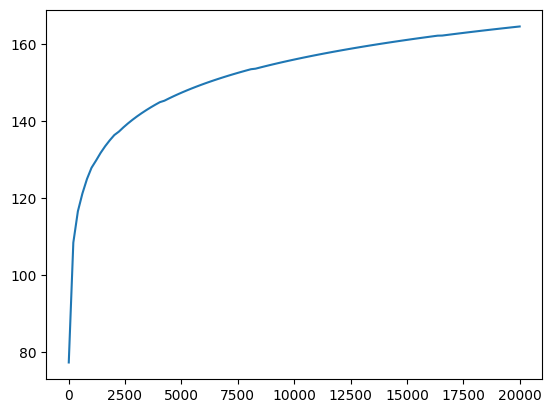

In [26]:
plt.plot(N, R)